# Set up

In [1]:
import numpy as np
import sys
import os
import glob
import importlib
import math as m
import pickle as pickle
import seaborn as sns
import statistics
import pandas as pd
fmts = ['svg','pdf']
from scipy.stats import norm, wilcoxon, ttest_rel, friedmanchisquare, shapiro,f_oneway,friedmanchisquare,rankdata
import statsmodels.stats.multitest as smm
from scipy import signal, fft
from scipy.optimize import curve_fit, minimize
import scipy.interpolate as interp
import matplotlib # produce matlab-style plots
from matplotlib import animation as ani # animation
import matplotlib.pyplot as plt # Matlab-style plotting
from matplotlib import rcParams
from matplotlib.lines import Line2D
from itertools import combinations
matplotlib.rc('font',**{'size':20}) # increase font size on plots
matplotlib.rc('text',usetex=False) # use LaTeX to render symbols
matplotlib.rc('animation',html='html5') # render animation
prop_cycle = plt.rcParams['axes.prop_cycle']
python_colors = prop_cycle.by_key()['color'] # python default color cycle

# auto reload modules
%load_ext autoreload
%autoreload 2
sys.path.append('C:\\Users\\amber\\Documents\\GitHub\\sensorimotor_fusion\\analysis\\Multimodal paper') # change this for your computer
# DATA_PATH = 'C:\\Users\\amber\\Documents\\GitHub\\sensorimotor_fusion' #change this for your computer

In [2]:
rcParams.update(matplotlib.rcParamsDefault)
# font = {#'family': 'serif', 'serif': ['Computer Modern'],
#         'weight' : 'ultralight',
#         'size'   : 14}
# matplotlib.rc('font', **font)
rcParams['axes.titlesize'] = 14
rcParams['font.size'] = 14
rcParams['font.weight'] = 'ultralight'
# rcParams['font.family'] = 'sans-serif'
rcParams['mathtext.fontset'] = 'cm'
# rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'

In [3]:
from globalVars import *
from collect_data import findFilename, getrawdata, get_data, analyze
from analysis import *

/Users/amberchou/Documents/GitHub/sensorimotor_fusion/analysis/Multimodal paper/globalVars.py:29: RuntimeWarning: divide by zero encountered in divide
  soM = lambda s : 1/(s**2 + s) #2nd order machine
/Users/amberchou/Documents/GitHub/sensorimotor_fusion/analysis/Multimodal paper/globalVars.py:29: RuntimeWarning: invalid value encountered in divide
  soM = lambda s : 1/(s**2 + s) #2nd order machine


In [4]:
print('data length = ',N)
print('primes = ',primes)
print('base freq = ',base_freq)
print('IX = ',IX)
print('Even_IX = ',Even_IX)
print('Odd_IX = ',Odd_IX)
print('freqs = ',freqs)
print('omegas = ',omegas)
print('T = ',T) # total time 40 seconds
print('t = ',t) # timestamps
print('fs = ',fs)
print('sample_period (dt)= ',dt)
print('xf = ',xf) # frequency domain x-axis, shape (N//2,)
print('Machine = ',M) # soM at stimulated freqs
print('scaleInput = ',scaleInput)
print('scaleOutputScreen = ',scaleOutputScreen)

data length =  2400
primes =  [ 2  3  5  7 11 13 17 19]
base freq =  0.05
IX =  [ 4  6 10 14 22 26 34 38]
Even_IX =  [ 6 14 26 38]
Odd_IX =  [ 4 10 22 34]
freqs =  [0.1  0.15 0.25 0.35 0.55 0.65 0.85 0.95]
omegas =  [0.62831853 0.9424778  1.57079633 2.19911486 3.45575192 4.08407045
 5.34070751 5.96902604]
T =  40
t =  [0.00000000e+00 1.66736140e-02 3.33472280e-02 ... 3.99666528e+01
 3.99833264e+01 4.00000000e+01]
fs =  60
sample_period (dt)=  0.016666666666666666
xf =  [0.0000e+00 2.5000e-02 5.0000e-02 ... 2.9925e+01 2.9950e+01 2.9975e+01]
Machine =  [-0.7169568 -1.14107219j -0.52958685-0.5619091j  -0.28840044-0.18360142j
 -0.17134712-0.0779164j  -0.07726649-0.02235881j -0.05656227-0.01384948j
 -0.03387172-0.00634218j -0.02730057-0.00457371j]
scaleInput =  0.04616974606700115
scaleOutputScreen =  0.25


# Load data

In [5]:
# with open('multimodal_data.pkl', 'wb') as file:
#     pickle.dump(ALLdata, file)

# Load the array from the file
with open('multimodal_data.pkl', 'rb') as file:
    Rs,Ds,MDs,Us,U0s,U1s,Ys,rs,ds,mds,us,u0s,u1s,ys,errors,Tur,Tu0r,Tu1r,Tud,Tu0d,Tu1d,Tyr,Tyd,F,B,F0,F1,B0,B1 = pickle.load(file)

In [119]:
print(Rs.shape) # subject x condition x trial x all freqs
print(rs.shape) # subject x condition x trial x timestamps
print(errors.shape) # subject x condition x trial

subject_num = Rs.shape[0]
condition_num = Rs.shape[1]
trial_num = Rs.shape[2]
print('subject_num = ',subject_num)
print('condition_num (alphas) = ',condition_num)
print('trial_num = ',trial_num)
alphas = np.array([0,0.25,0.5,0.75,1])
# conditions = ['0','0.25','0.5','0.75','1']
conditions = ['0','25','50','75','100']
# conditions = ['0:1','1:3','1:1','3:1','1:0']
# conditions = ['0:1','1:3','1:1','3:1','1:0']

(15, 5, 14, 2400)
(15, 5, 14, 2400)
(15, 5, 14)
subject_num =  15
condition_num (alphas) =  5
trial_num =  14


# check data

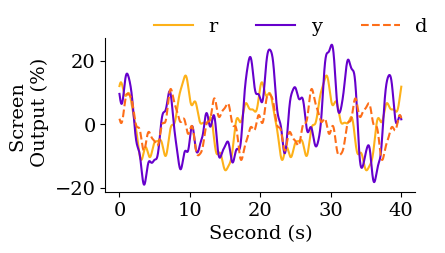

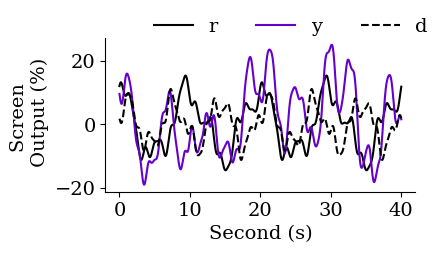

In [7]:
# example trial
fig,ax = plt.subplots(figsize=(4,2))
ax.plot(t,rs[0,0,-1,:]*100,label = 'r',color = colors['r'])
ax.plot(t,ys[0,0,-1,:]*100,label = 'y',color = colors['y'])
ax.plot(t,mds[0,0,-1,:]*100,linestyle = '--',label = 'd',color = colors['d'])
ax.set_ylabel('Screen \n Output (%)')
ax.set_xlabel('Second (s)')
ax.legend(bbox_to_anchor = (0.1,0.9), ncol=3, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

fig,ax = plt.subplots(figsize=(4,2))
ax.plot(t,rs[0,0,-1,:]*100,label = 'r',color = 'black')
ax.plot(t,ys[0,0,-1,:]*100,label = 'y',color = colors['y'])
ax.plot(t,mds[0,0,-1,:]*100,linestyle = '--',label = 'd',color = 'black')
ax.set_ylabel('Screen \n Output (%)')
ax.set_xlabel('Second (s)')
ax.legend(bbox_to_anchor = (0.1,0.9), ncol=3, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# fig,ax = plt.subplots(figsize=(4,2))
# ax.plot(t,us[0,0,-1,:]*100,label = 'u',color = colors['u'])
# ax.plot(t,ds[0,0,-1,:]*100,label = 'd',color = colors['d'])
# # plt.plot(t,mds[0,0,-2,:],label = 'md',color = colors['d'])
# ax.set_ylabel('input (%)')
# plt.legend()
# plt.show()

# Simuli

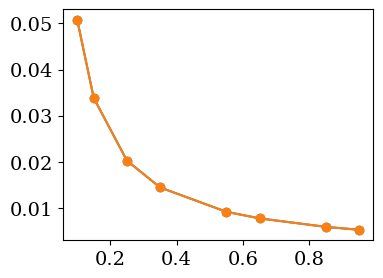

In [8]:
fig,ax = plt.subplots(figsize=(4,3))
Stimuli = np.zeros(IX.shape,dtype = complex)
Stimuli[::2] = Rs[0,0,-1,IX][::2] 
Stimuli[1::2] = Rs[0,0,-2,IX][1::2] 
ax.plot(freqs,np.abs(Stimuli),'-o')

Stimuli = np.zeros(IX.shape,dtype = complex)
Stimuli[1::2] = MDs[0,0,-1,IX][1::2] 
Stimuli[::2] = MDs[0,0,-2,IX][::2] 
ax.plot(freqs,np.abs(Stimuli),'-o')
plt.show()

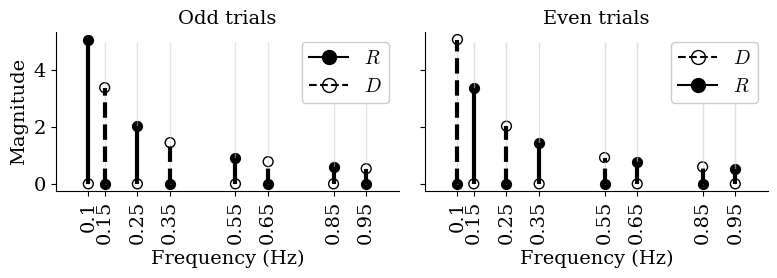

In [9]:
xticks = np.array([0.1 , 0.15, 0.25, 0.35, 0.55, 0.65, 0.85, 0.95])
xlim = (0.095, 1.0)
sub = 0
cond = 0

fig,axs = plt.subplots(1, 2,sharex = True,sharey = True,figsize=(8, 3)) 
ax = axs[0]
trial = 1
ax.vlines(freqs,ymin=-0.001, ymax=5,linewidth=1, color='0.8',alpha = 0.5)
R = np.abs( Rs[sub,cond,trial,IX]*100 )
D = np.abs( MDs[sub,cond,trial,IX]*100 )
ax.scatter(freqs,R, color='black',label=r'$R$_{odd}',s=50)
ax.scatter(freqs,D, color='black',label=r'$D_{even}$',facecolors='none',s=50)
ax.vlines(freqs,np.zeros((len(IX),)),R,color='black',linewidth = 3)
ax.vlines(freqs,np.zeros((len(IX),)),D,linestyles='--',color='black',linewidth = 3)
ax.set_xlim((0,21*base_freq))
# ax.set_ylim((-0.2,6))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,rotation=90) 
legend_elements = [Line2D([0], [0], marker='o', color='black' ,label=r'$R$',markersize=10),
                   Line2D([0], [0], ls = '--',marker='o',color='black', label=r'$D$',markerfacecolor='none',markersize=10)]
ax.legend(handles=legend_elements, loc='upper right', ncol=1, frameon=True, prop={'size': 14},facecolor = 'white',framealpha = 1)
ax.set_title('Odd trials')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = axs[1]
trial = 0
ax.vlines(freqs,ymin=-0.001, ymax=5,linewidth=1, color='0.8',alpha = 0.6)
R = np.abs( Rs[sub,cond,trial,IX]*100 )
D = np.abs( MDs[sub,cond,trial,IX]*100 )
ax.scatter(freqs,R, color='black',label=r'$R$_{odd}',s=50)
ax.scatter(freqs,D, color='black',label=r'$D_{even}$',facecolors='none',s=50)
ax.vlines(freqs,np.zeros((len(IX),)),R,color='black',linewidth = 3)
ax.vlines(freqs,np.zeros((len(IX),)),D,linestyles='--',color='black',linewidth = 3)
ax.set_xlim((0,21*base_freq))
# ax.set_ylim((-0.2,6))
ax.set_xlabel('Frequency (Hz)')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,rotation=90) 
legend_elements = [Line2D([0], [0], ls = '--', marker='o',color='black', label=r'$D$',markerfacecolor='none',markersize=10),
                   Line2D([0], [0], marker='o', color='black' ,label=r'$R$',markersize=10)]
ax.legend(handles=legend_elements, loc='upper right', ncol=1, frameon=True, prop={'size': 14},facecolor = 'white',framealpha = 1)
ax.set_title('Even trials')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
fig.savefig('stimuli.svg')
plt.show()

# Input (at stimuli)

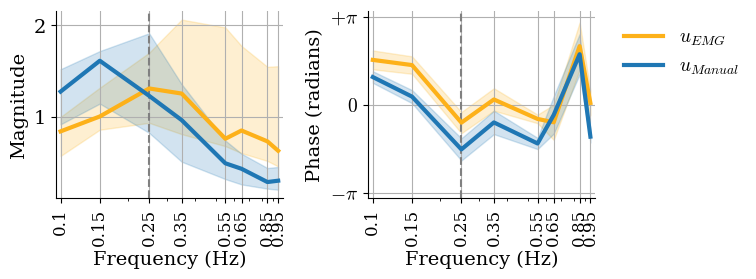

In [102]:
# population level for Even trials
# Bode plot of F and B
xticks = np.array([0.1 , 0.15, 0.25, 0.35, 0.55, 0.65, 0.85, 0.95])
xlim = (0.095, 1.0)
ylimphase = (-np.pi-0.2,np.pi+ 0.2)
yticksphase = [-np.pi,0.,np.pi]
yticklabelsphase = [r'$-\pi$',r'$0$',r'$+\pi$']

cond = 2
last_trials = 10
fig,axs = plt.subplots(1,2,sharex=True,figsize=(8,3))

# magnitude
ax = axs[0]
ax.axvline(x=0.25, color='grey', linestyle='--')
U0_mean = np.mean(np.abs(100*U0s[:,cond,-last_trials:,:][:,:,IX]),axis = 1) #mean across all trials
q25,q50,q75 = np.quantile(U0_mean,[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(freqs,q50,'-',label = 'EMG input',color = colors['GOLD'],linewidth = 3)
ax.fill_between(freqs, q25, q75, alpha=0.2,color = colors['GOLD'])

U1_mean = np.mean(np.abs(100*U1s[:,cond,-last_trials:,:][:,:,IX]),axis = 1) #mean across all trials
q25,q50,q75 = np.quantile(U1_mean,[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(freqs,q50,'-',label = 'Manual input',color = colors['BLUE'],linewidth = 3)
ax.fill_between(freqs, q25, q75, alpha=0.2,color = colors['BLUE'])

# ax.plot(freqs, 100*np.abs((1/M)*Stimuli),'--', label = 'Stimuli',color = 'black',linewidth = 3)

ax.set_xscale("log")
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,rotation=90,fontsize = 12) 
ax.grid('on',zorder=-1)
# ax.set_ylim(0.1,80)
# ax.set_yscale("log")
ax.set_ylabel('Magnitude')
ax.set_xlabel('Frequency (Hz)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# phase
ax = axs[1]
ax.axvline(x=0.25, color='grey', linestyle='--')
angles = np.angle(np.mean(np.exp(1j*(np.angle(100*U0s[:,cond,-last_trials:,:][:,:,IX]))),axis = 1))
z = np.mean(np.exp(1j*(angles-np.pi/2)), axis=0)
mean = np.angle(z)+np.pi/2
disp = 1 - np.abs(z)
ax.plot(freqs,mean,'-',label = r'$u_{EMG}$',color = colors['GOLD'],linewidth = 3)
ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['GOLD'])

angles = np.angle(np.mean(np.exp(1j*(np.angle(100*U1s[:,cond,-last_trials:,:][:,:,IX]))),axis = 1))
z = np.mean(np.exp(1j*(angles)), axis=0)
mean = np.angle(z)
disp = 1 - np.abs(z)
ax.plot(freqs,mean,'-',label = r'$u_{Manual}$',color = colors['BLUE'],linewidth = 3)
ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['BLUE'])

# ax.plot(freqs, np.angle(100*(1/M)*Stimuli),'--', label = 'Stimuli',color = 'black',linewidth = 3)

ax.set_ylabel('Phase (radians)') 
ax.grid('on',zorder=-1)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,rotation=90,fontsize = 12) 
ax.set_ylim(ylimphase)
ax.set_yticks(yticksphase)
ax.set_yticklabels(yticklabelsphase)
ax.set_xlabel('Frequency (Hz)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.legend(loc = 'lower left',frameon=False)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)
plt.tight_layout()
# fig.savefig('multimodal_inputs.svg')
plt.show()

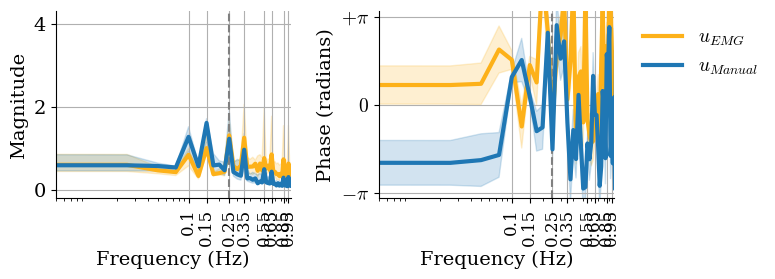

In [13]:
# population level for Even trials
# Bode plot of F and B
xticks = np.array([0.1 , 0.15, 0.25, 0.35, 0.55, 0.65, 0.85, 0.95])
xlim = (0.005, 1.0)
ylimphase = (-np.pi-0.2,np.pi+ 0.2)
yticksphase = [-np.pi,0.,np.pi]
yticklabelsphase = [r'$-\pi$',r'$0$',r'$+\pi$']

cond = 2
last_trials = 10
fig,axs = plt.subplots(1,2,sharex=True,figsize=(8,3))

# magnitude
ax = axs[0]
ax.axvline(x=0.25, color='grey', linestyle='--')
U0_mean = np.mean(np.abs(100*U0s[:,cond,-last_trials:,:][:,:,:N//2]),axis = 1) #mean across all trials
q25,q50,q75 = np.quantile(U0_mean,[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(xf,q50,'-',label = 'EMG input',color = colors['GOLD'],linewidth = 3)
ax.fill_between(xf, q25, q75, alpha=0.2,color = colors['GOLD'])

U1_mean = np.mean(np.abs(100*U1s[:,cond,-last_trials:,:][:,:,:N//2]),axis = 1) #mean across all trials
q25,q50,q75 = np.quantile(U1_mean,[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(xf,q50,'-',label = 'Manual input',color = colors['BLUE'],linewidth = 3)
ax.fill_between(xf, q25, q75, alpha=0.2,color = colors['BLUE'])

# ax.plot(freqs, 100*np.abs((1/M)*Stimuli),'--', label = 'Stimuli',color = 'black',linewidth = 3)

ax.set_xscale("log")
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,rotation=90,fontsize = 12) 
ax.grid('on',zorder=-1)
# ax.set_ylim(0.1,80)
# ax.set_yscale("log")
ax.set_ylabel('Magnitude')
ax.set_xlabel('Frequency (Hz)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# phase
ax = axs[1]
ax.axvline(x=0.25, color='grey', linestyle='--')
angles = np.angle(np.mean(np.exp(1j*(np.angle(100*U0s[:,cond,-last_trials:,:][:,:,:N//2]))),axis = 1))
z = np.mean(np.exp(1j*(angles-np.pi/2)), axis=0)
mean = np.angle(z)+np.pi/2
disp = 1 - np.abs(z)
ax.plot(xf,mean,'-',label = r'$u_{EMG}$',color = colors['GOLD'],linewidth = 3)
ax.fill_between(xf,mean+disp,mean-disp,alpha = 0.2,color = colors['GOLD'])

angles = np.angle(np.mean(np.exp(1j*(np.angle(100*U1s[:,cond,-last_trials:,:][:,:,:N//2]))),axis = 1))
z = np.mean(np.exp(1j*(angles)), axis=0)
mean = np.angle(z)
disp = 1 - np.abs(z)
ax.plot(xf,mean,'-',label = r'$u_{Manual}$',color = colors['BLUE'],linewidth = 3)
ax.fill_between(xf,mean+disp,mean-disp,alpha = 0.2,color = colors['BLUE'])

# ax.plot(freqs, np.angle(100*(1/M)*Stimuli),'--', label = 'Stimuli',color = 'black',linewidth = 3)

ax.set_ylabel('Phase (radians)') 
ax.grid('on',zorder=-1)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,rotation=90,fontsize = 12) 
ax.set_ylim(ylimphase)
ax.set_yticks(yticksphase)
ax.set_yticklabels(yticklabelsphase)
ax.set_xlabel('Frequency (Hz)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.legend(loc = 'lower left',frameon=False)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)
plt.tight_layout()
# fig.savefig('multimodal_inputs.svg')
plt.show()

# Seperate strategies

In [14]:
Group_a = [6, 9, 12]
Group_b = [0, 3, 5, 7, 8, 10, 13]
Group_c = [1, 2, 4, 11, 14]

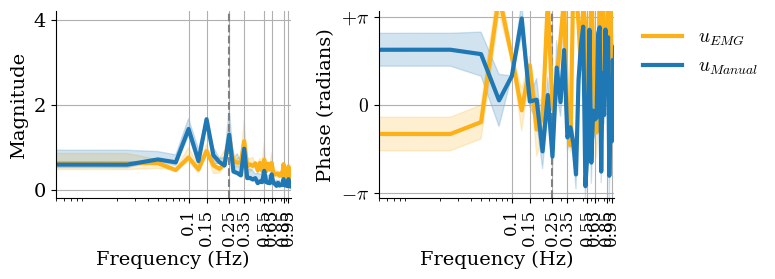

In [38]:
# population level for Even trials
subjects = Group_c

# Bode plot of F and B
xticks = np.array([0.1 , 0.15, 0.25, 0.35, 0.55, 0.65, 0.85, 0.95])
xlim = (0.005, 1.0)
ylimphase = (-np.pi-0.2,np.pi+ 0.2)
yticksphase = [-np.pi,0.,np.pi]
yticklabelsphase = [r'$-\pi$',r'$0$',r'$+\pi$']

cond = 2
last_trials = 10
fig,axs = plt.subplots(1,2,sharex=True,figsize=(8,3))

# magnitude
ax = axs[0]
ax.axvline(x=0.25, color='grey', linestyle='--')
U0_mean = np.mean(np.abs(100*U0s[subjects,cond,-last_trials:,:][:,:,:N//2]),axis = 1) #mean across all trials
q25,q50,q75 = np.quantile(U0_mean,[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(xf,q50,'-',label = 'EMG input',color = colors['GOLD'],linewidth = 3)
ax.fill_between(xf, q25, q75, alpha=0.2,color = colors['GOLD'])

U1_mean = np.mean(np.abs(100*U1s[subjects,cond,-last_trials:,:][:,:,:N//2]),axis = 1) #mean across all trials
q25,q50,q75 = np.quantile(U1_mean,[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(xf,q50,'-',label = 'Manual input',color = colors['BLUE'],linewidth = 3)
ax.fill_between(xf, q25, q75, alpha=0.2,color = colors['BLUE'])

# ax.plot(freqs, 100*np.abs((1/M)*Stimuli),'--', label = 'Stimuli',color = 'black',linewidth = 3)

ax.set_xscale("log")
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,rotation=90,fontsize = 12) 
ax.grid('on',zorder=-1)
# ax.set_ylim(0.1,80)
# ax.set_yscale("log")
ax.set_ylabel('Magnitude')
ax.set_xlabel('Frequency (Hz)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# phase
ax = axs[1]
ax.axvline(x=0.25, color='grey', linestyle='--')
angles = np.angle(np.mean(np.exp(1j*(np.angle(100*U0s[subjects,cond,-last_trials:,:][:,:,:N//2]))),axis = 1))
z = np.mean(np.exp(1j*(angles-np.pi/2)), axis=0)
mean = np.angle(z)+np.pi/2
disp = 1 - np.abs(z)
ax.plot(xf,mean,'-',label = r'$u_{EMG}$',color = colors['GOLD'],linewidth = 3)
ax.fill_between(xf,mean+disp,mean-disp,alpha = 0.2,color = colors['GOLD'])

angles = np.angle(np.mean(np.exp(1j*(np.angle(100*U1s[subjects,cond,-last_trials:,:][:,:,:N//2]))),axis = 1))
z = np.mean(np.exp(1j*(angles)), axis=0)
mean = np.angle(z)
disp = 1 - np.abs(z)
ax.plot(xf,mean,'-',label = r'$u_{Manual}$',color = colors['BLUE'],linewidth = 3)
ax.fill_between(xf,mean+disp,mean-disp,alpha = 0.2,color = colors['BLUE'])

# ax.plot(freqs, np.angle(100*(1/M)*Stimuli),'--', label = 'Stimuli',color = 'black',linewidth = 3)

ax.set_ylabel('Phase (radians)') 
ax.grid('on',zorder=-1)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,rotation=90,fontsize = 12) 
ax.set_ylim(ylimphase)
ax.set_yticks(yticksphase)
ax.set_yticklabels(yticklabelsphase)
ax.set_xlabel('Frequency (Hz)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.legend(loc = 'lower left',frameon=False)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)
plt.tight_layout()
# fig.savefig('multimodal_inputs.svg')
plt.show()

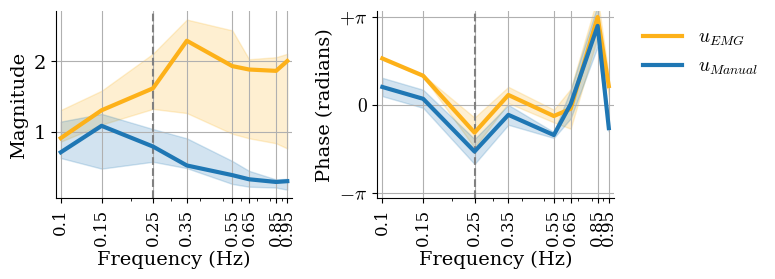

In [56]:
# population level for Even trials
subjects = Group_b
# Bode plot of F and B
xticks = np.array([0.1 , 0.15, 0.25, 0.35, 0.55, 0.65, 0.85, 0.95])
xlim = (0.095, 1.0)
ylimphase = (-np.pi-0.2,np.pi+ 0.2)
yticksphase = [-np.pi,0.,np.pi]
yticklabelsphase = [r'$-\pi$',r'$0$',r'$+\pi$']

cond = 2
last_trials = 10
fig,axs = plt.subplots(1,2,sharex=True,figsize=(8,3))

# magnitude
ax = axs[0]
ax.axvline(x=0.25, color='grey', linestyle='--')
U0_mean = np.mean(np.abs(100*U0s[subjects,cond,-last_trials:,:][:,:,IX]),axis = 1) #mean across all trials
q25,q50,q75 = np.quantile(U0_mean,[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(freqs,q50,'-',label = 'EMG input',color = colors['GOLD'],linewidth = 3)
ax.fill_between(freqs, q25, q75, alpha=0.2,color = colors['GOLD'])

U1_mean = np.mean(np.abs(100*U1s[subjects,cond,-last_trials:,:][:,:,IX]),axis = 1) #mean across all trials
q25,q50,q75 = np.quantile(U1_mean,[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(freqs,q50,'-',label = 'Manual input',color = colors['BLUE'],linewidth = 3)
ax.fill_between(freqs, q25, q75, alpha=0.2,color = colors['BLUE'])

# ax.plot(freqs, 100*np.abs((1/M)*Stimuli),'--', label = 'Stimuli',color = 'black',linewidth = 3)

ax.set_xscale("log")
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,rotation=90,fontsize = 12) 
ax.grid('on',zorder=-1)
# ax.set_ylim(0.1,80)
# ax.set_yscale("log")
ax.set_ylabel('Magnitude')
ax.set_xlabel('Frequency (Hz)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# phase
ax = axs[1]
ax.axvline(x=0.25, color='grey', linestyle='--')
angles = np.angle(np.mean(np.exp(1j*(np.angle(100*U0s[subjects,cond,-last_trials:,:][:,:,IX]))),axis = 1))
z = np.mean(np.exp(1j*(angles-np.pi/2)), axis=0)
mean = np.angle(z)+np.pi/2
disp = 1 - np.abs(z)
ax.plot(freqs,mean,'-',label = r'$u_{EMG}$',color = colors['GOLD'],linewidth = 3)
ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['GOLD'])

angles = np.angle(np.mean(np.exp(1j*(np.angle(100*U1s[subjects,cond,-last_trials:,:][:,:,IX]))),axis = 1))
z = np.mean(np.exp(1j*(angles)), axis=0)
mean = np.angle(z)
disp = 1 - np.abs(z)
ax.plot(freqs,mean,'-',label = r'$u_{Manual}$',color = colors['BLUE'],linewidth = 3)
ax.fill_between(freqs,mean+disp,mean-disp,alpha = 0.2,color = colors['BLUE'])

# ax.plot(freqs, np.angle(100*(1/M)*Stimuli),'--', label = 'Stimuli',color = 'black',linewidth = 3)

ax.set_ylabel('Phase (radians)') 
ax.grid('on',zorder=-1)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,rotation=90,fontsize = 12) 
ax.set_ylim(ylimphase)
ax.set_yticks(yticksphase)
ax.set_yticklabels(yticklabelsphase)
ax.set_xlabel('Frequency (Hz)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.legend(loc = 'lower left',frameon=False)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)
plt.tight_layout()
# fig.savefig('multimodal_inputs.svg')
plt.show()

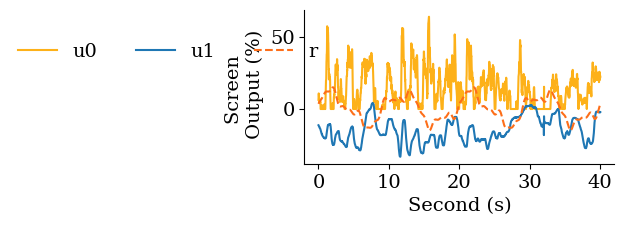

In [118]:
# input of group 3
sub = 2
cond = 2
trial = -1
fig,ax = plt.subplots(figsize=(4,2))
ax.plot(t,u0s[sub,cond,trial,:]*100,label = 'u0',color = colors['GOLD'])
ax.plot(t,u1s[sub,cond,trial,:]*100,label = 'u1',color = colors['BLUE'])
ax.plot(t,rs[sub,cond,trial,:]*100,linestyle = '--',label = 'r',color = colors['d'])

# ax.plot(t,mds[sub,cond,trial,:]*100,linestyle = '--',label = 'd',color = colors['d'])
# ax.plot(t,rs[sub,cond,trial,:]*100 - ys[sub,cond,trial,:]*100,linestyle = '--',label = 'e',color = colors['d'])

ax.set_ylabel('Screen \n Output (%)')
ax.set_xlabel('Second (s)')
ax.legend(bbox_to_anchor = (0.1,0.9), ncol=3, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

/var/folders/p2/rhv64v0d7sd4cvv1wvcg9v700000gn/T/ipykernel_4767/61913176.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(xf,q50,'-',label = strategy_names[i],color = strategy_colors[i],linewidth = 2,linestyle = strategy_lines[i])
/var/folders/p2/rhv64v0d7sd4cvv1wvcg9v700000gn/T/ipykernel_4767/61913176.py:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(xf,mean,'-',label = strategy_names[i],color = strategy_colors[i],linewidth = 2,linestyle = strategy_lines[i])


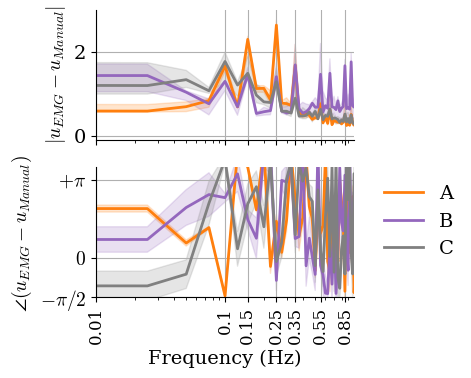

In [93]:

xticks = np.array([0.01,0.1 , 0.15, 0.25, 0.35, 0.55, 0.85])
xlim = (0.01, 1.0)
ylimphase = (-np.pi/2,np.pi+ 0.5)
yticksphase = [-np.pi/2,0.,np.pi]
yticklabelsphase = [r'$-\pi/2$',r'$0$',r'$+\pi$']

cond = 2
last_trials = 10
fig,axs = plt.subplots(2,1,sharex=True,figsize=(5,4))
strategy_colors = [colors['ORANGE'],colors['PURPLE'],'grey']
strategy_lines = ['-','-','-']
strategy_names = ['A','B','C']

for i,subjects in enumerate([Group_a,Group_b,Group_c]):
    # magnitude
    ax = axs[0]
    U0_mean = np.mean(np.abs(100*U0s[subjects,cond,-last_trials:,:][:,:,:N//2] - 100*U1s[subjects,cond,-last_trials:,:][:,:,:N//2]),axis = 1) #mean across all trials
    q25,q50,q75 = np.quantile(U0_mean,[0.25,0.5,0.75],axis = 0) # across subjects
    ax.plot(xf,q50,'-',label = strategy_names[i],color = strategy_colors[i],linewidth = 2,linestyle = strategy_lines[i])
    ax.fill_between(xf, q25, q75, alpha=0.2,color = strategy_colors[i])
    ax.set_xscale("log")
    ax.set_xlim(xlim)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks,rotation=90,fontsize = 12) 
    ax.grid('on',zorder=-1)
    ax.set_ylim(-0.1,3)
    # ax.set_yscale("log")
    ax.set_ylabel(r'$|u_{EMG}-u_{Manual}|$')
    # ax.set_xlabel('Frequency (Hz)')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # phase
    ax = axs[1]
    # ax.axvline(x=0.25, color='grey', linestyle='--')
    angles = np.angle(np.mean(np.exp(1j*(np.angle(100*U0s[subjects,cond,-last_trials:,:][:,:,:N//2]-100*U1s[subjects,cond,-last_trials:,:][:,:,:N//2]))),axis = 1))
    z = np.mean(np.exp(1j*(angles-np.pi/2)), axis=0)
    mean = np.angle(z)+np.pi/2
    disp = 1 - np.abs(z)
    ax.plot(xf,mean,'-',label = strategy_names[i],color = strategy_colors[i],linewidth = 2,linestyle = strategy_lines[i])
    ax.fill_between(xf,mean+disp,mean-disp,alpha = 0.2,color = strategy_colors[i])



ax.set_ylabel(r'$\angle (u_{EMG}-u_{Manual})$ ') 
ax.grid('on',zorder=-1)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,rotation=90,fontsize = 12) 
ax.set_ylim(ylimphase)
ax.set_yticks(yticksphase)
ax.set_yticklabels(yticklabelsphase)
ax.set_xlabel('Frequency (Hz)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.legend(loc = 'lower left',frameon=False)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)
plt.tight_layout()
# fig.savefig('multimodal_inputs.svg')
plt.show()

# single modal performance

In [120]:
Group_a = [6, 9, 12]
Group_b = [0, 3, 5, 7, 8, 10, 13]
Group_c = [1, 2, 4, 11, 14]

(array([nan,  2.,  2., nan]), array([ nan, 0.75, 0.75,  nan]), array([nan,  0.,  0., nan]), [])
(array([nan,  0.,  0., nan]), array([     nan, 0.015625, 0.015625,      nan]), array([nan,  1.,  1., nan]), ['there is significant difference between condition 0 and condition 1, w = 0.0, pvalue = 0.015625'])
(array([nan,  6.,  6., nan]), array([   nan, 0.8125, 0.8125,    nan]), array([nan,  0.,  0., nan]), [])


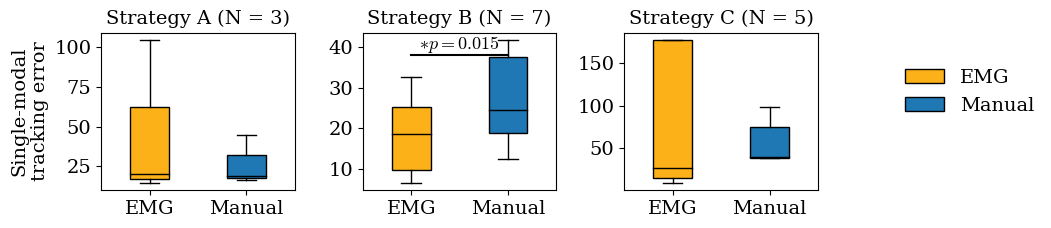

In [128]:
labels = ['EMG','Manual'] #slider : EMG
# labels = ['EMG''\n'r'$\alpha = 1$','Manual''\n'r'$\alpha = 0$'] #slider : EMG
boxcolors = [colors['GOLD'],colors['BLUE']]
last_few_trials = 4

fig,axs= plt.subplots(1,3,figsize=(8.5,2.5))
ax = axs[0]
slider = np.mean(errors[Group_a,0,-last_few_trials:],axis = 1) # slider only condition, last 4 trials
emg = np.mean(errors[Group_a,4,-last_few_trials:],axis = 1) # emg only condition, last 4 trials 
datas = [emg,slider]
bplot = ax.boxplot(datas, widths = 0.4,patch_artist=True,labels=labels, showfliers=False)
for patch, color in zip(bplot['boxes'], boxcolors): # fill with colors
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')
ax.set_title('Strategy A (N = '+str(len(Group_a))+')',fontsize = 14) # add title
ax.set_ylabel('Single-modal''\n''tracking error',fontsize = 14) # add y axis label
print(WilcoxonTest(datas))

ax = axs[1]
slider = np.mean(errors[Group_b,0,-last_few_trials:],axis = 1) # slider only condition, last 4 trials
emg = np.mean(errors[Group_b,4,-last_few_trials:],axis = 1) # emg only condition, last 4 trials 
datas = [emg,slider]
bplot = ax.boxplot(datas, widths = 0.4,patch_artist=True,labels=labels, showfliers=False)
for patch, color in zip(bplot['boxes'], boxcolors): # fill with colors
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')
ax.set_title('Strategy B (N = '+str(len(Group_b))+')',fontsize = 14)
print(WilcoxonTest(datas))
ax.plot([1,2], [38,38], color='black', lw=1.5)
ax.text(1.5, 38, r'$* p = 0.015$', ha='center', va='bottom', fontsize=13, color='black')

ax = axs[2]
slider = np.mean(errors[Group_c,0,-last_few_trials:],axis = 1) # slider only condition, last 4 trials
emg = np.mean(errors[Group_c,4,-last_few_trials:],axis = 1) # emg only condition, last 4 trials 
datas = [emg,slider]
bplot = ax.boxplot(datas, widths = 0.4,patch_artist=True,labels=labels, showfliers=False)
for patch, color in zip(bplot['boxes'], boxcolors): # fill with colors
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')
ax.set_title('Strategy C (N = '+str(len(Group_c))+')',fontsize = 14) # add title
print(WilcoxonTest(datas))
fig.legend([bplot["boxes"][0],bplot["boxes"][1]], 
            ['EMG','Manual'], 
            bbox_to_anchor=(1.25, 0.75),ncol=1,frameon=False,fontsize = 14)
plt.tight_layout()
# fig.savefig('group_errors.svg')
plt.show()

# First 4 vs last 4 FF

In [132]:
F.shape

(15, 5, 7, 8)

(array([nan, 59., 59., nan]), array([       nan, 0.97796631, 0.97796631,        nan]), array([nan,  0.,  0., nan]), [])
(array([nan,  2.,  2., nan]), array([   nan, 0.1875, 0.1875,    nan]), array([nan,  0.,  0., nan]), [])


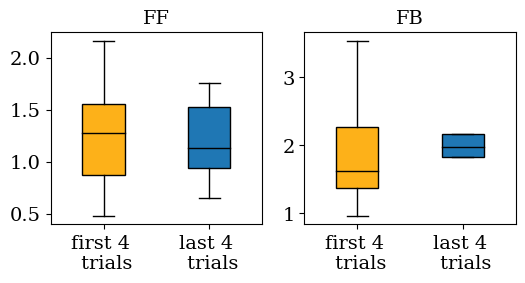

In [156]:
labels = ['first 4 \n trials','last 4 \n trials'] #slider : EMG
# labels = ['EMG''\n'r'$\alpha = 1$','Manual''\n'r'$\alpha = 0$'] #slider : EMG
boxcolors = [colors['GOLD'],colors['BLUE']]
cond = 2
lowest_freq = 3


fig,axs= plt.subplots(1,2,figsize=(6,2.5))
ax = axs[0]
first_4 = np.mean(np.abs(F[:,cond,:2,:lowest_freq]),axis=(1,2))
last_4 = np.mean(np.abs(F[:,cond,-2:,:lowest_freq]),axis=(1,2))
datas = [first_4,last_4]
bplot = ax.boxplot(datas, widths = 0.4,patch_artist=True,labels=labels, showfliers=False)
for patch, color in zip(bplot['boxes'], boxcolors): # fill with colors
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')
ax.set_title('FF',fontsize = 14) # add title
# ax.set_ylabel('Single-modal''\n''tracking error',fontsize = 14) # add y axis label
print(WilcoxonTest(datas))

ax = axs[1]
first_4 = np.mean(np.abs(B[subs,cond,:2,:lowest_freq]),axis=(1,2))
last_4 = np.mean(np.abs(B[subs,cond,-2:,:lowest_freq]),axis=(1,2))
datas = [first_4,last_4]
bplot = ax.boxplot(datas, widths = 0.4,patch_artist=True,labels=labels, showfliers=False)
for patch, color in zip(bplot['boxes'], boxcolors): # fill with colors
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')
ax.set_title('FB',fontsize = 14)
print(WilcoxonTest(datas))


In [171]:
import scipy.stats as stats

In [194]:
TF[subs,cond,:1,:lowest_freq].shape

(5, 1, 3)

(array([nan,  0.,  0., nan]), array([ nan, 0.25, 0.25,  nan]), array([nan,  0.,  0., nan]), [])
t-test p-value: 0.1869151768005768
(array([nan, 14., 14., nan]), array([nan,  1.,  1., nan]), array([nan,  0.,  0., nan]), [])
t-test p-value: 0.9130072780085179
(array([nan,  2.,  2., nan]), array([   nan, 0.1875, 0.1875,    nan]), array([nan,  0.,  0., nan]), [])
t-test p-value: 0.1476546774927959


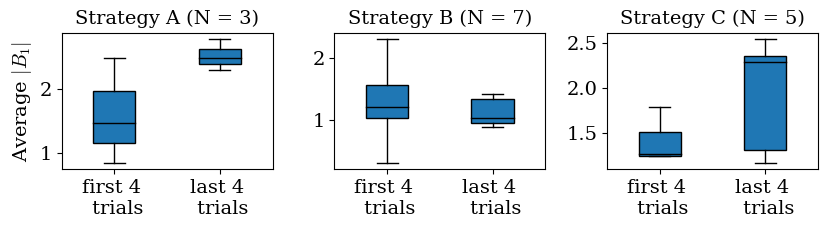

In [198]:
labels = ['first 4 \n trials','last 4 \n trials'] #slider : EMG
# labels = ['EMG''\n'r'$\alpha = 1$','Manual''\n'r'$\alpha = 0$'] #slider : EMG
# boxcolors = ['lightgrey','grey']
# boxcolors = [colors['GOLD'],colors['GOLD']]
boxcolors = [colors['BLUE'],colors['BLUE']]
cond = 2
lowest_freq = 3

TF = F1

fig,axs= plt.subplots(1,3,figsize=(8.5,2.5))
ax = axs[0]
subs = Group_a
first_4 = np.mean(np.abs(TF[subs,cond,:1,:lowest_freq]),axis=(1,2))
last_4 = np.mean(np.abs(TF[subs,cond,-1:,:lowest_freq]),axis=(1,2))
datas = [first_4,last_4]
bplot = ax.boxplot(datas, widths = 0.4,patch_artist=True,labels=labels, showfliers=False)
for patch, color in zip(bplot['boxes'], boxcolors): # fill with colors
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')
ax.set_title('Strategy A (N = '+str(len(Group_a))+')',fontsize = 14) # add title
ax.set_ylabel(r'Average $|B_1|$',fontsize = 14) # add y axis label
print(WilcoxonTest(datas))
t_statistic_welch, p_value_welch = stats.ttest_ind(first_4,last_4, equal_var=False)
print('t-test p-value:', p_value_welch)

ax = axs[1]
subs = Group_b
first_4 = np.mean(np.abs(TF[subs,cond,:2,:lowest_freq]),axis=(1,2))
last_4 = np.mean(np.abs(TF[subs,cond,-2:,:lowest_freq]),axis=(1,2))
datas = [first_4,last_4]
bplot = ax.boxplot(datas, widths = 0.4,patch_artist=True,labels=labels, showfliers=False)
for patch, color in zip(bplot['boxes'], boxcolors): # fill with colors
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')
ax.set_title('Strategy B (N = '+str(len(Group_b))+')',fontsize = 14)
print(WilcoxonTest(datas))
# ax.plot([1,2], [38,38], color='black', lw=1.5)
# ax.text(1.5, 38, r'$* p = 0.015$', ha='center', va='bottom', fontsize=13, color='black')
t_statistic_welch, p_value_welch = stats.ttest_ind(first_4,last_4, equal_var=False)
print('t-test p-value:', p_value_welch)


ax = axs[2]
subs = Group_c
first_4 = np.mean(np.abs(TF[subs,cond,:2,:lowest_freq]),axis=(1,2))
last_4 = np.mean(np.abs(TF[subs,cond,-2:,:lowest_freq]),axis=(1,2))
datas = [first_4,last_4]
bplot = ax.boxplot(datas, widths = 0.4,patch_artist=True,labels=labels, showfliers=False)
for patch, color in zip(bplot['boxes'], boxcolors): # fill with colors
    patch.set_facecolor(color)
for median in bplot['medians']:
    median.set_color('black')
ax.set_title('Strategy C (N = '+str(len(Group_c))+')',fontsize = 14) # add title
print(WilcoxonTest(datas))
t_statistic_welch, p_value_welch = stats.ttest_ind(first_4,last_4, equal_var=False)
print('t-test p-value:', p_value_welch)
# fig.legend([bplot["boxes"][0],bplot["boxes"][1]], 
#             ['first','last'], 
#             bbox_to_anchor=(1.25, 0.75),ncol=1,frameon=False,fontsize = 14)

plt.tight_layout()
# fig.savefig('group_errors.svg')
plt.show()